# 콘텐츠 기반 필터링 (content based filtering)
# 데이터셋: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
# 참고자료: https://lsjsj92.tistory.com/565

In [14]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Recommender_System/tmdb_movie")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/Recommender_System/tmdb_movie'

In [15]:
# 라이브러리 선언
import pandas as pd

# 컬럼 설명
## genres: 영화 장르
## keywords: 영화의 키워드
## original_language: 영화 언어
## title: 제목
## vote_average: 평점 평균
## vote_count: 평점 카운트
## popularity: 인지도
## overview: 개요 설명

In [39]:
#data = pd.read_csv('tmdb_5000_credits.csv')
data = pd.read_csv('tmdb_5000_movies.csv')

In [40]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [41]:
data.shape

(4803, 20)

# 데이터 전처리

In [42]:
data = data[['id', 'genres', 'vote_average', 'vote_count', 'popularity', 'title', 'keywords', 'overview']]

## vote_average는 평균평점을 뜻하는데, 이는 불공정한 면이 있음
# 평점을 남긴 count가 적은 경우가 이에 해당하는데, 일반적으로 vote 수가 많을수록 많은 사람들이 평가를 했다는 의미가 되고, 그러면 평점이 5점이 나올 수 없고 떨어질 수 밖에 없음. 이를 해결하기 위해 imdb에서 처리한 방법 weighted rating 방법 존재

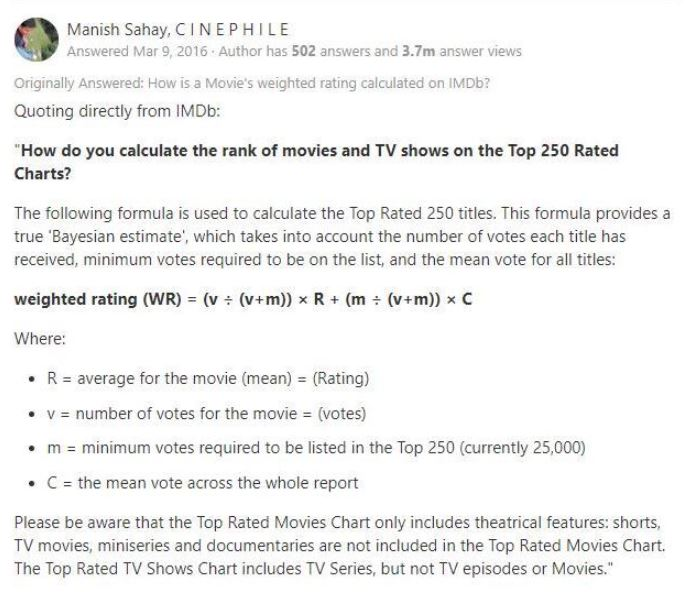

# r: 개별 영화 평점
# v: 개별 영화에 평점을 투표한 횟수
# m: 250위 안에 들어야 하는 최소 투표 (본 프로젝트에서는 500위로 하기로 함.)
# c: 전체 영화에 대한 평균 평점

In [43]:
m = data['vote_count'].quantile(0.9)
data = data.loc[data['vote_count'] >= m]

In [44]:
data.head()

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


In [45]:
data.shape

(481, 8)

In [46]:
C = data['vote_average'].mean()

In [47]:
print(C)
print(m)

6.962993762993763
1838.4000000000015


In [48]:
def weighted_rating(x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']

    return (v / (v+m) * R) + (m / (m+v) * C)

In [49]:
data['score'] = data.apply(weighted_rating, axis = 1)

In [50]:
data.head(5)

,id,genres,vote_average,vote_count,popularity,title,keywords,overview,score
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",7.168053
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",6.918271
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,6.493333
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,7.492998
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",6.500396


In [51]:
data.shape

(481, 9)

In [52]:
data[['genres', 'keywords']].head(2)
# dictionary 형태

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."


In [53]:
import ast

data['genres'] = data['genres'].apply(ast.literal_eval)
data['keywords'] = data['keywords'].apply(ast.literal_eval)

In [54]:
data[['genres', 'keywords']].head(2)
# list와 dictionary 형태

,genres,keywords
0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na..."


In [55]:
# dict 형태 --> list 형태 --> 띄어쓰기로 이루어진 str로 변경
data['genres'] = data['genres'].apply(lambda x: [d['name'] for d in x]).apply(lambda x: " ".join(x))
data['keywords'] = data['keywords'].apply(lambda x: [d['name'] for d in x]).apply(lambda x: " ".join(x))

In [56]:
data.head(2)

,id,genres,vote_average,vote_count,popularity,title,keywords,overview,score
0,19995,Action Adventure Fantasy Science Fiction,7.2,11800,150.437577,Avatar,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",7.168053
1,285,Adventure Fantasy Action,6.9,4500,139.082615,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",6.918271


In [57]:
data.genres.head(2)

0    Action Adventure Fantasy Science Fiction
1                    Adventure Fantasy Action
Name: genres, dtype: object

In [61]:
# 띄어쓰기를 구분자로 한 문자열을 숫자로 바꾸어 벡터화 시킴
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(ngram_range = (1, 3))

In [62]:
c_vector_genres = count_vector.fit_transform(data['genres'])

In [63]:
c_vector_genres.shape

(481, 364)

# content based filtering 시작

In [64]:
# 코사인 유사도를 구함
from sklearn.metrics.pairwise import cosine_similarity

gerne_c_sim = cosine_similarity(c_vector_genres, c_vector_genres).argsort()[:, ::-1]

In [65]:
gerne_c_sim.shape

(481, 481)

In [68]:
def get_recommend_movie_list(df, movie_title, top = 30):

    # 특정 영화와 비슷한 영화를 추천해야 하기 떄문에 '특정 영화'에 대한 정보를 추출
    target_movie_index = df[df['title'] == movie_title].index.values

    # 코사인 유사도 중 비슷한 코사인 유사도를 가진 정보를 뽑아낸다.
    sim_index = gerne_c_sim[target_movie_index, :top].reshape(-1)

    # 본인을 제외
    sim_index = sim_index[sim_index != target_movie_index]

    # 데이터프레임으로 만들고 vote_count으로 정렬한 뒤 return
    result = df.iloc[sim_index].sort_values('score', ascending = False)[:10]

    return result

In [69]:
get_recommend_movie_list(data, movie_title = 'The Dark Knight Rises')

,id,genres,vote_average,vote_count,popularity,title,keywords,overview,score
65,155,Drama Action Crime Thriller,8.2,12002,187.322927,The Dark Knight,dc comics crime fighter secret identity scarec...,Batman raises the stakes in his war on crime. ...,8.035690
2091,274,Crime Drama Thriller,8.1,4443,18.174804,The Silence of the Lambs,based on novel psychopath horror suspense seri...,"FBI trainee, Clarice Starling ventures into a ...",7.767228
2760,264644,Drama Thriller,8.1,2757,66.113340,Room,based on novel carpet isolation kidnapping imp...,Jack is a young boy of 5 years old who has liv...,7.645138
351,1422,Drama Thriller Crime,7.9,4339,63.429157,The Departed,undercover boston police friends mafia underco...,"To take down South Boston's Irish Mafia, the p...",7.621146
1850,111,Action Crime Drama Thriller,8.0,2948,70.105981,Scarface,miami corruption capitalism cuba prohibition b...,After getting a green card in exchange for ass...,7.601698
4337,103,Crime Drama,8.0,2535,58.845025,Taxi Driver,vietnam veteran taxi obsession drug dealer nig...,A mentally unstable Vietnam War veteran works ...,7.564085
1051,146233,Drama Thriller Crime,7.9,3085,88.496873,Prisoners,pennsylvania kidnapping maze vigilante rural s...,When Keller Dover's daughter and her friend go...,7.550121
828,24,Action Crime,7.7,4949,79.754966,Kill Bill: Vol. 1,japan coma martial arts kung fu underworld yak...,An assassin is shot at the altar by her ruthle...,7.500378
3701,641,Crime Drama,7.9,2443,11.573034,Requiem for a Dream,drug addiction junkie heroin speed diet unsoci...,The hopes and dreams of four ambitious people ...,7.497657
1829,6977,Crime Drama Thriller,7.7,3003,53.645267,No Country for Old Men,texas drug traffic hitman united states–mexico...,"Llewelyn Moss stumbles upon dead bodies, $2 mi...",7.420140
